# Marketing Mix Data Processing and Modeling 

##  The Marketing Mix

We use __marketing mix__ elements to break down our products and services into components so that we can better understand how to strengthen a brand and make better products for our target markets. There have been a few different iterations of the [Marketing Mix](https://marketingmix.co.uk/definition-marketing-mix/) as people became more in-tune with business-consumer relationships, needs, and wants (known as the 4 P's, 7 P's, and 4 C's), which break down into these (somewhat overlapping) main ideas:

 - __Product__: What makes the product "the product"--features, benefits, intended use, actual use, "genre" of product, competitors's products
 - __Price__: Price to the consumer, price to the business, perceived value, profit, market share, market penetration, competitor prices
 - __Place__: Physical placement in a brick and mortar store, where the product is sold (e.g. in person vs. online, or both), how and where the product is distributed 
 - __Promotion__: Advertisement content and medium (e.g. online, paper ads, billboards, influencers, etc.), product promotions, public relations, sales organization and strategy
 - __People__: The staff and employees of the business, salespeople/customer point-of-contact, business culture
 - __Process__: How the products get to the end-consumer and related support, efficiencies/bottlenecks in the process, research and development, design
 - __Physical Evidence__: Customer experience with the brand, public perception, product packaging, online/social media presence
 - __Cost__: Cost of the product and the opportunity cost to the consumer and business
 - __Consumer Wants and Needs__: Consumer needs and wants and how these relate to other products on the market and future shifts
 - __Communication__: How the organization has an "open dialogue" with consumers to inform product development
 - __Convenience__: Product's availability and convenience for consumers regarding access, use, and sharing

## Marketing Mix Modeling 

Most of the marketing mix elements are qualitative elements because we need to figure out what the elements are that make our product different (at least in the eyes of consumers) that other products or services (e.g. if one of the features of our *product* is the color, we need to identify the colors that best suit our needs). However, simply knowing the qualitative elements doesn't give us much evidence or support to figure out why these elements are important or which elements are more important or lagging because of our business's operations. For this, we'll perform __marketing mix modeling__ analysis, in which, we essentially "define" a numerical value for each of our marketing mix inputs and then run a regression analysis to figure out which elements (independent variables) are most significant to a specified output (dependent variable), and how they relate to each other. 

For example, we may want to understand how the __product, price, place,__ and __promotion__ of a product affected sales over a 6-month period, we may set up our data to include: 
 - *sales per week* as our *dependent variable*  
 - the number of products for each product sold each week as our *product independent variables*
 - the price of each product as our *price independent variable*
 - dummy variable for an online or in-store purchase as our *place independent variable*
 - percentage discount as our *promotion independent variable*
 
Then, run a regression analysis to see which of these variables (if any) were significant in driving or deterring sales for our 6-month period. 

## Marketing Mix Modeling with Baltimore City Employee Turnover 

To continue our Baltimore City government employee churn analysis, we'll use marketing mix elements to help determine why some departments experience churn, and what factors might keep employees in city government jobs. Similar to how we imagined the Baltimore City government employees as "customers," we'll imagine their overtime earnings (*cost*), salary increases (*price*), salary before they left city government (*price*),job changes (*place*), and number of people in their department (*physical evidence*) to see what may have a significant impact on employee churn or retention. 

### import libraries

In [4]:
# for data analysis
import pandas as pd
import numpy as np

# for visualization
import plotly.express as px

### import data 

We'll import our previously cleaned and aggregated dataset of Baltimore City government employee salaries from fiscal years 2011-2019, that also has the department subdivisions for HLTH, TRANS, COMP, FIN, and DPW removed.

In [5]:
# import cleaned and aggregated Baltimore City salary data
df = pd.read_csv("https://raw.githubusercontent.com/jhu-business-analytics/customer-churn-example/master/baltimore_salaries_2011_2019_agg_dept.csv")

In [10]:
# preview data
df.head(2)

employee_name                       jobtitle  deptid  \
0  Aaron,Patricia G  Facilities/Office Services II  A03031   
1     Aaron,Petra L     ASSISTANT STATE'S ATTORNEY  A29005   

                 dept_name     hire_dt  annual_rt     gross  fiscal_year  \
0       OED-Employment Dev  1979-10-24    50845.0  45505.94         2011   
1  States Attorneys Office  2006-09-25    56595.0  51588.89         2011   

   years_in_gov  
0      31.68306  
1       4.76122

### clean data 

In [11]:
# we notice that some job titles/dept names/employee names are either in CamelCase or in all caps
# so, let's make all of the text in this dataframe all caps to standardize and better group the data

# upper case ["employee_name", "jobtitle", "dept_name"]

col_to_upper = ["employee_name", "jobtitle", "dept_name"]

# for each item in the list col_to_upper
for col in col_to_upper:
    
    # transform the text in that column to uppercase
    df[col] = df[col].str.upper()

In [12]:
# preview data
df.head()

employee_name                       jobtitle  deptid  \
0    AARON,PATRICIA G  FACILITIES/OFFICE SERVICES II  A03031   
1       AARON,PETRA L     ASSISTANT STATE'S ATTORNEY  A29005   
2  ABAINEH,YOHANNES T                 EPIDEMIOLOGIST  A65026   
3  ABDAL-RAHIM,NAIM A                EMT FIREFIGHTER  A64063   
4      ABDI,EZEKIEL W                 POLICE OFFICER  A99398   

                 dept_name     hire_dt  annual_rt     gross  fiscal_year  \
0       OED-EMPLOYMENT DEV  1979-10-24    50845.0  45505.94         2011   
1  STATES ATTORNEYS OFFICE  2006-09-25    56595.0  51588.89         2011   
2                     HLTH  2009-07-23    56500.0  50633.26         2011   
3    FIRE ACADEMY RECRUITS  2011-03-30    33476.0   3888.95         2011   
4        POLICE DEPARTMENT  2007-06-14    50919.0  51421.73         2011   

   years_in_gov  
0     31.683060  
1      4.761220  
2      1.935700  
3      0.251887  
4      4.043889

### Create new variables to better understand employee churn 

#### Calculate Number of Jobs held from 2011-2019 

In [27]:
# pivot table to see number of jobs from 2011-2019

df_pivot_jobtitle = pd.pivot_table(df,
                             index = "employee_name",
                             columns = "fiscal_year",
                             values = "jobtitle",
                             aggfunc = np.sum).reset_index()

In [28]:
df_pivot_jobtitle.head(10)

fiscal_year          employee_name                           2011  \
0                   AARON,KAREEM D                            NaN   
1                  AARON,KEAIRAH T                            NaN   
2                  AARON,KEONTAE E                            NaN   
3                 AARON,PATRICIA G  FACILITIES/OFFICE SERVICES II   
4                    AARON,PETRA L     ASSISTANT STATE'S ATTORNEY   
5                    ABADIR,ADAM O                            NaN   
6               ABAINEH,YOHANNES T                 EPIDEMIOLOGIST   
7            ABAKU,AIGBOLOSIMUAN O                            NaN   
8                    ABBEDUTO,MACK                            NaN   
9                 ABBENE,ANTHONY M                            NaN   

fiscal_year                           2012                           2013  \
0                                      NaN                            NaN   
1                                      NaN                 AIDE BLUE CHIP   
2                                      NaN                 AIDE BLUE CHIP   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   
5                                      NaN                            NaN   
6                           EPIDEMIOLOGIST                 EPIDEMIOLOGIST   
7                                      NaN                            NaN   
8                                      NaN                            NaN   
9                                      NaN                            NaN   

fiscal_year                           2014                           2015  \
0                                      NaN                            NaN   
1                                      NaN                            NaN   
2                           AIDE BLUE CHIP                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   
5                                      NaN                            NaN   
6                           EPIDEMIOLOGIST                 EPIDEMIOLOGIST   
7                                      NaN                            NaN   
8                                      NaN                            NaN   
9                   POLICE OFFICER TRAINEE                 POLICE OFFICER   

fiscal_year                           2016                           2017  \
0                                      NaN                            NaN   
1                                      NaN                            NaN   
2                                      NaN                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   
5                                      NaN             COUNCIL TECHNICIAN   
6                                      NaN                            NaN   
7                                      NaN                            NaN   
8                                      NaN                  LAW CLERK SAO   
9                                      NaN                            NaN   

fiscal_year                           2018                           2019  
0                                      NaN        UTILITIES INST REPAIR I  
1                                      NaN                            NaN  
2                                      NaN                            NaN  
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II  
4               ASSISTANT STATE'S ATTORNEY                            NaN  
5                       COUNCIL TECHNICIAN             COUNCIL TECHNICIAN  
6                                      NaN                            NaN  
7                   POLICE OFFICER TRAINEE                 POLICE OFFICER  
8           

By looking at the progression of job titles for each person, we can see when they worked in Baltimore City government and when they were promoted. For example, if we look at __ABBENE,ANTHONY M__ in Row 9, we can see that they progressed from a police officer trainee to a police officer. We may also be able to discern how successful contractual positions or programs like YouthWorks are in attracting and retaining city government employees by looking at their progression from something like "CONTRACT SERV SPEC II" or "AIDE BLUE CHIP" to a regular civil service position.

Since it's difficult to go through each person's job progression to determine their promotions throughout their Baltimore City government tenure, we'll estimate their number of promotions by counting the number of unique job titles that they've held from 2011-2019.

In [29]:
# make new column for number of unique postitions held in Baltimore City government 
# for each person who's been employed by Baltimore City government in 2011-2019

# axis = 1 means that we're counting the number of unique items per row
# we need to subtract 1, because this will count the person's name as a unique item
# this will also not count any NaN columns

df_pivot_jobtitle["number_of_jobs"] = df_pivot_jobtitle.nunique(axis = "columns") -1

In [30]:
# preview data
df_pivot_jobtitle.head()

fiscal_year     employee_name                           2011  \
0              AARON,KAREEM D                            NaN   
1             AARON,KEAIRAH T                            NaN   
2             AARON,KEONTAE E                            NaN   
3            AARON,PATRICIA G  FACILITIES/OFFICE SERVICES II   
4               AARON,PETRA L     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2012                           2013  \
0                                      NaN                            NaN   
1                                      NaN                 AIDE BLUE CHIP   
2                                      NaN                 AIDE BLUE CHIP   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2014                           2015  \
0                                      NaN                            NaN   
1                                      NaN                            NaN   
2                           AIDE BLUE CHIP                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2016                           2017  \
0                                      NaN                            NaN   
1                                      NaN                            NaN   
2                                      NaN                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2018                           2019  \
0                                      NaN        UTILITIES INST REPAIR I   
1                                      NaN                            NaN   
2                                      NaN                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY                            NaN   

fiscal_year  number_of_jobs  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1

In [31]:
# create a histogram to look at the distribution of number of jobs held by employees
hist_num_jobs = px.histogram(df_pivot_jobtitle,
                            x = "number_of_jobs",
                            title = "histogram of number of jobs held by employees in 2011-2019")

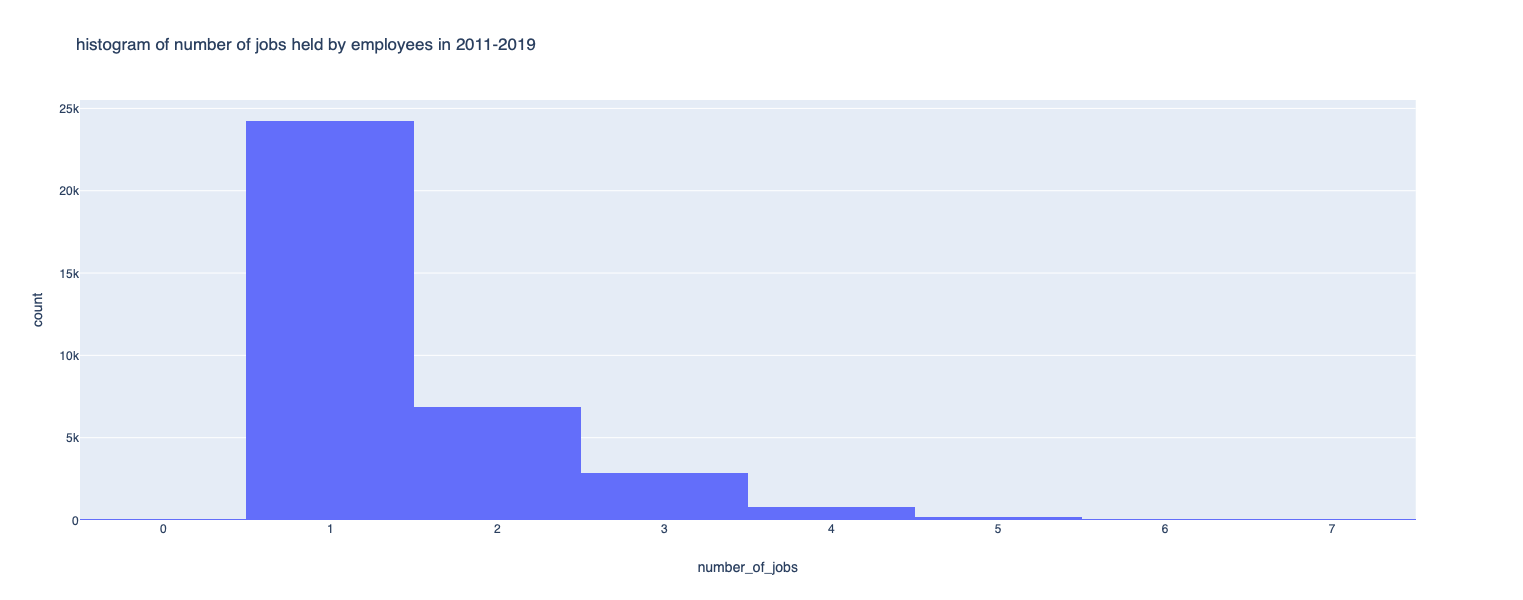

In [32]:
hist_num_jobs

This tells us that the majority of people who worked for Baltimore City government between 2011-2019, held one job, but this also includes all of the part time workers (we know at least 5,000 YouthWorks emloyees from our employee churn data) who may only be seasonally employed for less than one year from 2011-2019. Additionally, knowing the number of jobs that an employee held only tells us part of the story--we don't know how long each of these employees worked in city government (are all of the 1-job people part-time workers? are all of the 3+ job people long-term employees?), we don't know the age distribution of city government employees and how this relates to employee churn, we don't know the number of promotions for the employees for stayed vs. the employees who have left their positions in city government, and we don't know if a person's last salary or number of job changes/promotions is any indicator of them leaving city government, among many, many other things.

To gain some insight into the differences between employees who stay in city government vs. employees who leave city government, we'll create some variables from our exisiting data, then merge, correlate, and graph the results. 


In [35]:
# new dataframe that has name and number of jobs
df_number_of_jobs = df_pivot_jobtitle[["employee_name", "number_of_jobs"]]

##### Number of Jobs in City Government

In [36]:
df_number_of_jobs.head(3)

fiscal_year    employee_name  number_of_jobs
0             AARON,KAREEM D               1
1            AARON,KEAIRAH T               1
2            AARON,KEONTAE E               1

#### Percentage increase in salary and last salary earned

In [38]:
# pivot table to see salary for each year in city government based on employee's annual salary

df_pivot_salary = pd.pivot_table(df,
                             index = "employee_name",
                             columns = "fiscal_year",
                             values = "annual_rt",
                             aggfunc = np.sum).reset_index()

In [40]:
# preview data
df_pivot_salary.head(10)

fiscal_year          employee_name     2011     2012     2013     2014  \
0                   AARON,KAREEM D      NaN      NaN      NaN      NaN   
1                  AARON,KEAIRAH T      NaN      NaN  11310.0      NaN   
2                  AARON,KEONTAE E      NaN      NaN  11310.0  11310.0   
3                 AARON,PATRICIA G  50845.0  51862.0  51862.0  53428.0   
4                    AARON,PETRA L  56595.0  64000.0  64000.0  68300.0   
5                    ABADIR,ADAM O      NaN      NaN      NaN      NaN   
6               ABAINEH,YOHANNES T  56500.0  57900.0  57900.0  62000.0   
7            ABAKU,AIGBOLOSIMUAN O      NaN      NaN      NaN      NaN   
8                    ABBEDUTO,MACK      NaN      NaN      NaN      NaN   
9                 ABBENE,ANTHONY M      NaN      NaN      NaN  43999.0   

fiscal_year     2015     2016     2017     2018     2019  
0                NaN      NaN      NaN      NaN  32470.0  
1                NaN      NaN      NaN      NaN      NaN  
2                NaN      NaN      NaN      NaN      NaN  
3            55314.0  56705.0  57863.0  60200.0  60200.0  
4            74000.0  75500.0  78600.0  81200.0      NaN  
5                NaN      NaN  54486.0  64823.0  64823.0  
6            64500.0      NaN      NaN      NaN      NaN  
7                NaN      NaN      NaN  50440.0  53640.0  
8                NaN      NaN  37415.0  38926.0  68562.0  
9            46309.0      NaN      NaN      NaN      NaN

From our new dataframe, we can see each employee's salary increase over their tenure in city government. This is helpful to look at promotion trends and potential discrepancies in salary increases among different genders, ethnicities, departments, and ages.

We want to create two new columns: 
1. The employee's last salary earned, or their salary in 2019 if they're still employed in city government
2. The change in employee's salary over their tenure in city government--essentially their salary percentage change, which equates to __(initial salary - final salary)/initial salary__. This tells us their salary percentage increase over time. 

Since each employee has a different "end year," we can't use any one df["column"] to identify a single column that houses the employee's last salary. However, since our dataframe fills in a NaN value (blank/null placeholders) if the employee hasn't earned a salary (i.e. left city government), we can utilize this by "forward filling" the last valid value util the last column and then call the values in the last column as everyone's last salary. For example, if an employee stopped working for city government in fiscal year 2016, they might have salary values for years 2011-2016, and NaN values for 2017-2019. When we forward fill the values, the salary data for 2016 will fill in the placeholders for 2017-2019. Then, we can use df[2019] as the value for the employee's last earned salary.

In [41]:
# create a new dataframe called df_ffil_salary
# make the dataframe forward fill all values in different columns within each row (axis=1)
df_ffil_salary = df_pivot_salary.fillna(method = "ffill", axis = 1)

In [42]:
# preview forward filled dataset
df_ffil_salary.head()

fiscal_year     employee_name             2011             2012  \
0              AARON,KAREEM D   AARON,KAREEM D   AARON,KAREEM D   
1             AARON,KEAIRAH T  AARON,KEAIRAH T  AARON,KEAIRAH T   
2             AARON,KEONTAE E  AARON,KEONTAE E  AARON,KEONTAE E   
3            AARON,PATRICIA G            50845            51862   
4               AARON,PETRA L            56595            64000   

fiscal_year            2013            2014            2015            2016  \
0            AARON,KAREEM D  AARON,KAREEM D  AARON,KAREEM D  AARON,KAREEM D   
1                     11310           11310           11310           11310   
2                     11310           11310           11310           11310   
3                     51862           53428           55314           56705   
4                     64000           68300           74000           75500   

fiscal_year            2017            2018   2019  
0            AARON,KAREEM D  AARON,KAREEM D  32470  
1                     11310           11310  11310  
2                     11310           11310  11310  
3                     57863           60200  60200  
4                     78600           81200  81200

In [43]:
# add in a new column into our pivot table that includes the employee's last earned salary from our ff dataframe
df_pivot_salary["last_salary"] = df_ffil_salary[2019]

In [44]:
# preview data
df_pivot_salary.head()

fiscal_year     employee_name     2011     2012     2013     2014     2015  \
0              AARON,KAREEM D      NaN      NaN      NaN      NaN      NaN   
1             AARON,KEAIRAH T      NaN      NaN  11310.0      NaN      NaN   
2             AARON,KEONTAE E      NaN      NaN  11310.0  11310.0      NaN   
3            AARON,PATRICIA G  50845.0  51862.0  51862.0  53428.0  55314.0   
4               AARON,PETRA L  56595.0  64000.0  64000.0  68300.0  74000.0   

fiscal_year     2016     2017     2018     2019 last_salary  
0                NaN      NaN      NaN  32470.0       32470  
1                NaN      NaN      NaN      NaN       11310  
2                NaN      NaN      NaN      NaN       11310  
3            56705.0  57863.0  60200.0  60200.0       60200  
4            75500.0  78600.0  81200.0      NaN       81200

In [45]:
# we also need the employee's first earned salary to calcualte their percentage increase
# we'll use a backfill method to fill in the employee's first earned salary into the 2011 column

df_bfil_salary = df_pivot_salary.fillna(method = "bfill", axis = 1)

In [46]:
# preview data
df_bfil_salary.head(10)

fiscal_year          employee_name   2011   2012   2013   2014   2015   2016  \
0                   AARON,KAREEM D  32470  32470  32470  32470  32470  32470   
1                  AARON,KEAIRAH T  11310  11310  11310  11310  11310  11310   
2                  AARON,KEONTAE E  11310  11310  11310  11310  11310  11310   
3                 AARON,PATRICIA G  50845  51862  51862  53428  55314  56705   
4                    AARON,PETRA L  56595  64000  64000  68300  74000  75500   
5                    ABADIR,ADAM O  54486  54486  54486  54486  54486  54486   
6               ABAINEH,YOHANNES T  56500  57900  57900  62000  64500  64500   
7            ABAKU,AIGBOLOSIMUAN O  50440  50440  50440  50440  50440  50440   
8                    ABBEDUTO,MACK  37415  37415  37415  37415  37415  37415   
9                 ABBENE,ANTHONY M  43999  43999  43999  43999  46309  46309   

fiscal_year   2017   2018   2019 last_salary  
0            32470  32470  32470       32470  
1            11310  11310  11310       11310  
2            11310  11310  11310       11310  
3            57863  60200  60200       60200  
4            78600  81200  81200       81200  
5            54486  64823  64823       64823  
6            64500  64500  64500       64500  
7            50440  50440  53640       53640  
8            37415  38926  68562       68562  
9            46309  46309  46309       46309

In [47]:
# add a new column for the employee's first salary into our original pivot table
df_pivot_salary["first_salary"] = df_bfil_salary[2011]

In [64]:
# preview data
df_pivot_salary.head()

fiscal_year     employee_name     2011     2012     2013     2014     2015  \
0              AARON,KAREEM D      NaN      NaN      NaN      NaN      NaN   
1             AARON,KEAIRAH T      NaN      NaN  11310.0      NaN      NaN   
2             AARON,KEONTAE E      NaN      NaN  11310.0  11310.0      NaN   
3            AARON,PATRICIA G  50845.0  51862.0  51862.0  53428.0  55314.0   
4               AARON,PETRA L  56595.0  64000.0  64000.0  68300.0  74000.0   

fiscal_year     2016     2017     2018     2019 last_salary first_salary  
0                NaN      NaN      NaN  32470.0       32470        32470  
1                NaN      NaN      NaN      NaN       11310        11310  
2                NaN      NaN      NaN      NaN       11310        11310  
3            56705.0  57863.0  60200.0  60200.0       60200        50845  
4            75500.0  78600.0  81200.0      NaN       81200        56595

In [66]:
# to calculate the salary percentage increase for each employee, 
# we need to remove the instances where the initial salary was 0
df_pivot_salary = df_pivot_salary[df_pivot_salary["first_salary"] != 0]

In [69]:
# create a new column that calculates the percent change in salary
# (initial salary - final salary) / initial salary
# multiply by 100 to view the "percent" 
df_pivot_salary["salary_change"] = ((df_pivot_salary["last_salary"]-df_pivot_salary["first_salary"])/df_pivot_salary["first_salary"])*100

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
# preview data
df_pivot_salary.head(20)

fiscal_year          employee_name     2011     2012     2013     2014  \
0                   AARON,KAREEM D      NaN      NaN      NaN      NaN   
1                  AARON,KEAIRAH T      NaN      NaN  11310.0      NaN   
2                  AARON,KEONTAE E      NaN      NaN  11310.0  11310.0   
3                 AARON,PATRICIA G  50845.0  51862.0  51862.0  53428.0   
4                    AARON,PETRA L  56595.0  64000.0  64000.0  68300.0   
5                    ABADIR,ADAM O      NaN      NaN      NaN      NaN   
6               ABAINEH,YOHANNES T  56500.0  57900.0  57900.0  62000.0   
7            ABAKU,AIGBOLOSIMUAN O      NaN      NaN      NaN      NaN   
8                    ABBEDUTO,MACK      NaN      NaN      NaN      NaN   
9                 ABBENE,ANTHONY M      NaN      NaN      NaN  43999.0   
10                  ABBEY,EMMANUEL      NaN      NaN  52000.0  52000.0   
11                  ABBOTT,ETHAN N      NaN      NaN      NaN      NaN   
12            ABBOTT-COLE,MICHELLE      NaN      NaN      NaN      NaN   
13              ABDAL-RAHIM,NAIM A  33476.0  34146.0  40650.0  62175.0   
14           ABDELMEGUID,SHAHRAZAD      NaN      NaN      NaN      NaN   
15                  ABDI,EZEKIEL W  50919.0  58244.0  68847.0  70918.0   
16             ABDUL ADL,ATTRICE A      NaN  41194.0  41194.0  42438.0   
17               ABDUL AZIZ,HAJR E      NaN      NaN      NaN  11310.0   
18             ABDUL AZIZ,JENNAH A      NaN      NaN      NaN  11310.0   
19              ABDUL AZIZ,YAQUB M      NaN      NaN      NaN  11310.0   

fiscal_year     2015     2016     2017     2018     2019 last_salary  \
0                NaN      NaN      NaN      NaN  32470.0       32470   
1                NaN      NaN      NaN      NaN      NaN       11310   
2                NaN      NaN      NaN      NaN      NaN       11310   
3            55314.0  56705.0  57863.0  60200.0  60200.0       60200   
4            74000.0  75500.0  78600.0  81200.0      NaN       81200   
5                NaN      NaN  54486.0  64823.0  64823.0       64823   
6            64500.0      NaN      NaN      NaN      NaN       64500   
7                NaN      NaN      NaN  50440.0  53640.0       53640   
8                NaN      NaN  37415.0  38926.0  68562.0       68562   
9            46309.0      NaN      NaN      NaN      NaN       46309   
10           60060.0  60060.0      NaN      NaN      NaN       60060   
11               NaN      NaN      NaN  33280.0  33280.0       33280   
12           42702.0  70000.0  72800.0  74300.0  75110.0       75110   
13           62175.0  64365.0  65009.0  66310.0  69595.0       69595   
14               NaN  40019.0  67218.0      NaN      NaN       67218   
15           77343.0  82780.0  83576.0  86902.0  93284.0       93284   
16           44548.0  45471.0  45893.0  48701.0  50079.0       50079   
17           18408.0  18408.0  22464.0  22464.0  28554.0       28554   
18           18408.0  18408.0  22464.0      NaN      NaN       22464   
19           18408.0  18408.0  22464.0  22464.0  28554.0       28554   

fiscal_year first_salary salary_change  
0                  32470             0  
1                  11310             0  
2                  11310             0  
3                  50845       18.3991  
4                  56595       43.4756  
5                  54486       18.9718  
6                  56500       14.1593  
7                  50440       6.34417  
8                  37415       83.2474  
9                  43999       5.25012  
10                 52000          15.5  
11                 33280             0  
12                 42702       75.8934  
13                 33476       107.895  
14                 40019       67.9652  
15                 50919       83.2008  
16                 41194       21.5687  
17                 11310       152.467  
18                 11310       98.6207  
19                 11310       152.467

In [71]:
# what's the distribution of salary increases for all employees?
# create a histogram of percentage increases to see the frequency of percentage increases    
hist_salary_change = px.histogram(df_pivot_salary,
                            x = "salary_change",
                            title = "histogram of salary percentage change from first to last job in 2011-2019")

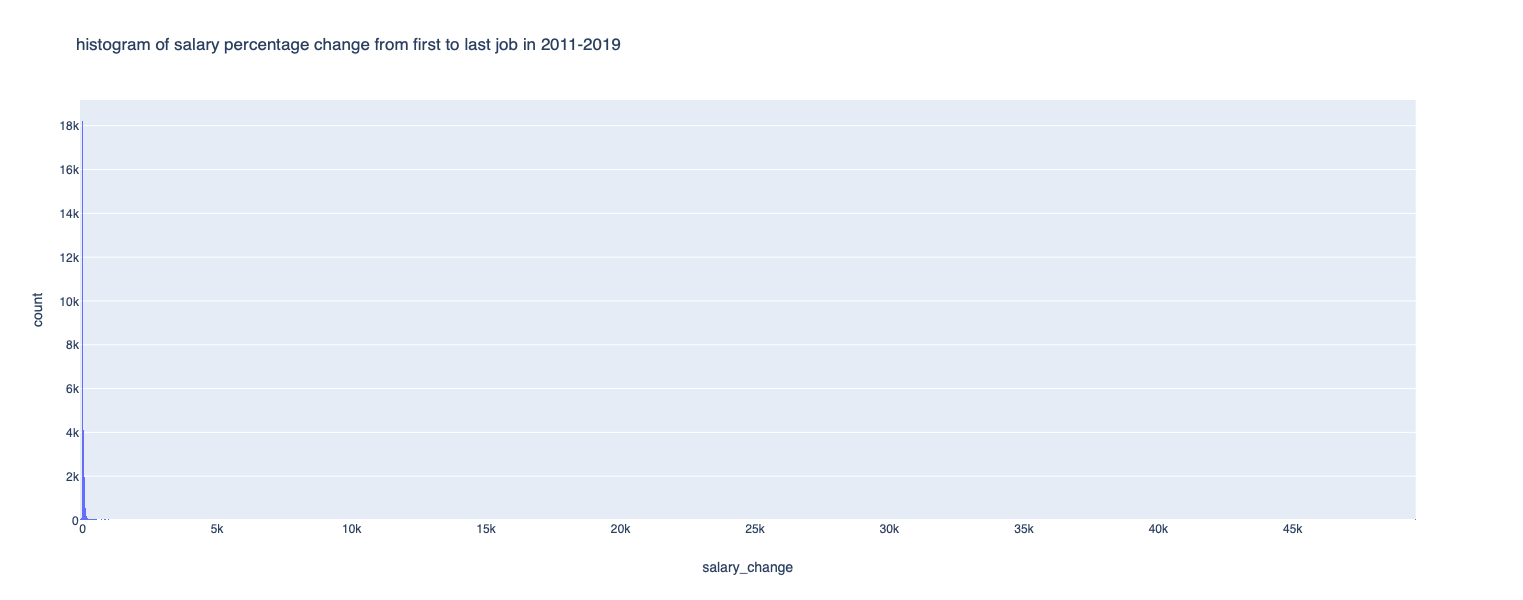

In [72]:
hist_salary_change

Our initial analysis shows that someone's salary increased by 50,000%, which is either a typo or an outlier that we want to remove. We'll sort our data by the salary percentage increase, and then re-plot our data to gain insight into what our data is telling us.

In [75]:
# look at the top 50 (head(50)) greatest (ascending = False) percentage increases
df_pivot_salary.sort_values(by = "salary_change", ascending = False).head(50)

fiscal_year           employee_name     2011     2012      2013      2014  \
29973                 SWIFT,MICHAEL    377.0    377.0  187200.0  187200.0   
23556               OMALLEY,CAROL A   2000.0   2000.0    2000.0    2000.0   
1564                 BARB,MICHAEL A      NaN      NaN       NaN    8062.0   
4971                BUTLER,YVONNE C   3600.0  28603.0       NaN       NaN   
33695             WILLIAMS,SYLVIA A   3600.0  28603.0   28603.0   28603.0   
7085              CORNISH,PORSCHE N      NaN      NaN       NaN       NaN   
22154                  MOORE,DANA P      NaN      NaN       NaN       NaN   
28033               SHIVERS,ANDRE W      NaN  11310.0   11310.0   11310.0   
4180                 BROWN,KARIMA A      NaN  11310.0   11310.0       NaN   
22083                MOODY,JOSHUA A      NaN      NaN   11310.0   11310.0   
24447         PETTIFORD JR,GERARD L      NaN      NaN       NaN   11310.0   
22533           MOULDEN,AURLENOTA S      NaN  11310.0       NaN   11310.0   
16344             JOHNSON,BRANDON E      NaN      NaN   11310.0       NaN   
3974                BROWN,ANTONIO L      NaN  18408.0       NaN       NaN   
27787               SEWELL,ZAKIYA S      NaN  11310.0   11310.0   11310.0   
21162               MCLEAN,TYONIA T      NaN      NaN   11310.0   11310.0   
30681           THOMAS,TWANNESHIA D   6240.0      NaN   27040.0       NaN   
19208        LITTLE-STATEN,LOLITA B      NaN  10176.0   21424.0   21424.0   
4504                 BRYANT,NIJAH M      NaN      NaN       NaN   11310.0   
13223              HAMMOND,AYANNA P      NaN  11310.0   11310.0   11310.0   
29654             STOKES EL,PHILLIP  12212.0  12212.0   36117.0   42213.0   
22469               MOSBY,MARILYN J  56500.0      NaN       NaN       NaN   
5803                   CELSO,JOEL M      NaN  15080.0       NaN       NaN   
20594            MCCARTHY,ANTHONY W  32853.0  33510.0       NaN       NaN   
20146                MARTIN,GANESHA      NaN  41500.0   80000.0  117000.0   
13892            HAWKINS JR,EDDIE L      NaN      NaN   11310.0       NaN   
32041              WALKER,TONELLE A   8751.0   9040.0    9601.0    9891.0   
31053                TOMLIN,WANDA D   8863.0   9601.0   33206.0   10038.0   
34017         WINCHESTER,REGINALD L      NaN      NaN       NaN   11310.0   
33221           WILKINS,GERALDINE M   8863.0   9040.0    9601.0   10038.0   
34080               WINSTON,ELLIS E      NaN      NaN   11310.0       NaN   
18553                LAUER,PAMELA J  12212.0  12212.0   25709.0   25709.0   
1771          BARTHOLOMEW,CARMELITA   9413.0   9744.0   33206.0   10038.0   
30979                TINDAL,PRINGLE   9413.0   9744.0   33206.0   10038.0   
28697                 SMITH,FREDDIE   9413.0   9744.0   33206.0   33500.0   
5582                   CARTER,GLENN   9413.0   9744.0   33206.0   10038.0   
33315           WILLIAMS,ANTOINETTE   9413.0   9744.0    9744.0   10038.0   
2101                   BELL,GRACE E      NaN  11310.0       NaN       NaN   
5871               CHAMBERS,SHAWN T      NaN      NaN       NaN   11310.0   
31132              TOWLER,TONETTE B   9553.0   9744.0   33206.0   33500.0   
26184                   ROANE,DIANE   9553.0  10036.0   33498.0   10339.0   
16225               JOHNS,BRANDON A      NaN      NaN       NaN   11310.0   
10521               FLOYD,CHANDON N      NaN      NaN       NaN   11310.0   
33604              WILLIAMS,NANETTE   9553.0   9744.0   33206.0   10038.0   
32581               WEBBER,STELLA M   9553.0   9744.0   33206.0   10038.0   
23701               OWENS,SHAKITA Q   9553.0   9744.0   33206.0   33500.0   
33045             WHITING,TARSHIA M   9553.0   9744.0    9744.0   10038.0   
19473               LOWTHER,WANYA R      NaN      NaN       NaN   11310.0   
10059            FAULKNER,JESSICA M  16744.0   7953.0       NaN   32169.0   
26399              ROBINSON,LINDA D   8863.0      NaN       NaN       NaN   

fiscal_year      2015      2016      2017      2018      2019 last_salar

It looks like quite a few employees have over 200% increase in their salary over their tenure, which may be as few as two years. This is most likely due to people moving from a part-time position to a full-time position, so let's merge their number of job changes and last department name to the end of this dataframe to compare. 

In [78]:
# get the last department and last job title of each employee using forward fill
# pivot table of job titles in the values: 
df_pivot_jobtitle.head()

fiscal_year     employee_name                           2011  \
0              AARON,KAREEM D                            NaN   
1             AARON,KEAIRAH T                            NaN   
2             AARON,KEONTAE E                            NaN   
3            AARON,PATRICIA G  FACILITIES/OFFICE SERVICES II   
4               AARON,PETRA L     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2012                           2013  \
0                                      NaN                            NaN   
1                                      NaN                 AIDE BLUE CHIP   
2                                      NaN                 AIDE BLUE CHIP   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2014                           2015  \
0                                      NaN                            NaN   
1                                      NaN                            NaN   
2                           AIDE BLUE CHIP                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2016                           2017  \
0                                      NaN                            NaN   
1                                      NaN                            NaN   
2                                      NaN                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2018                           2019  \
0                                      NaN        UTILITIES INST REPAIR I   
1                                      NaN                            NaN   
2                                      NaN                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY                            NaN   

fiscal_year  number_of_jobs  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1

In [79]:
# forward fill the job title names
df_ffill_jobs = df_pivot_jobtitle.fillna(method = "ffill", axis = 1)

In [82]:
# preview data
df_ffill_jobs.head(3)

fiscal_year    employee_name             2011             2012  \
0             AARON,KAREEM D   AARON,KAREEM D   AARON,KAREEM D   
1            AARON,KEAIRAH T  AARON,KEAIRAH T  AARON,KEAIRAH T   
2            AARON,KEONTAE E  AARON,KEONTAE E  AARON,KEONTAE E   

fiscal_year            2013            2014            2015            2016  \
0            AARON,KAREEM D  AARON,KAREEM D  AARON,KAREEM D  AARON,KAREEM D   
1            AIDE BLUE CHIP  AIDE BLUE CHIP  AIDE BLUE CHIP  AIDE BLUE CHIP   
2            AIDE BLUE CHIP  AIDE BLUE CHIP  AIDE BLUE CHIP  AIDE BLUE CHIP   

fiscal_year            2017            2018                     2019  \
0            AARON,KAREEM D  AARON,KAREEM D  UTILITIES INST REPAIR I   
1            AIDE BLUE CHIP  AIDE BLUE CHIP           AIDE BLUE CHIP   
2            AIDE BLUE CHIP  AIDE BLUE CHIP           AIDE BLUE CHIP   

fiscal_year number_of_jobs  
0                        1  
1                        1  
2                        1

In [83]:
# create a pivot table with departments in the values
df_num_of_dept = pd.pivot_table(df,
                               index = "employee_name",
                               columns = "fiscal_year",
                               values = "dept_name",
                               aggfunc = np.sum).reset_index()

In [84]:
# preview data
df_num_of_dept.head()

fiscal_year     employee_name                     2011  \
0              AARON,KAREEM D                      NaN   
1             AARON,KEAIRAH T                      NaN   
2             AARON,KEONTAE E                      NaN   
3            AARON,PATRICIA G       OED-EMPLOYMENT DEV   
4               AARON,PETRA L  STATES ATTORNEYS OFFICE   

fiscal_year                     2012                     2013  \
0                                NaN                      NaN   
1                                NaN             YOUTH SUMMER   
2                                NaN             YOUTH SUMMER   
3                 OED-EMPLOYMENT DEV       OED-EMPLOYMENT DEV   
4            STATES ATTORNEYS OFFICE  STATES ATTORNEYS OFFICE   

fiscal_year                     2014                     2015  \
0                                NaN                      NaN   
1                                NaN                      NaN   
2                       YOUTH SUMMER                      NaN   
3                 OED-EMPLOYMENT DEV       OED-EMPLOYMENT DEV   
4            STATES ATTORNEYS OFFICE  STATES ATTORNEYS OFFICE   

fiscal_year                     2016                     2017  \
0                                NaN                      NaN   
1                                NaN                      NaN   
2                                NaN                      NaN   
3                 OED-EMPLOYMENT DEV       OED-EMPLOYMENT DEV   
4            STATES ATTORNEYS OFFICE  STATES ATTORNEYS OFFICE   

fiscal_year                     2018                2019  
0                                NaN                 DPW  
1                                NaN                 NaN  
2                                NaN                 NaN  
3                 OED-EMPLOYMENT DEV  OED-EMPLOYMENT DEV  
4            STATES ATTORNEYS OFFICE                 NaN

In [86]:
# count the number of departments that an employee has worked in during their tenure and add as a new column
df_num_of_dept["number_of_dept"] = df_num_of_dept.nunique(axis = "columns") -1

In [87]:
# make 2019 contain the last department that the employee worked for during their tenure
# in a new dataframe
df_ffill_dept = df_num_of_dept.fillna(method = "ffill", axis = 1)

In [89]:
# create a new column that is the employee's last department
df_num_of_dept["last_dept"] = df_ffill_dept[2019]

In [90]:
# create a filtered dataframe to only include number of departments and last department
df_dept_count = df_num_of_dept[["employee_name", "last_dept", "number_of_dept"]]

In [91]:
# preview data
df_dept_count.head()

fiscal_year     employee_name                last_dept  number_of_dept
0              AARON,KAREEM D                      DPW               1
1             AARON,KEAIRAH T             YOUTH SUMMER               1
2             AARON,KEONTAE E             YOUTH SUMMER               1
3            AARON,PATRICIA G       OED-EMPLOYMENT DEV               1
4               AARON,PETRA L  STATES ATTORNEYS OFFICE               1

In [93]:
# also estimate the number of years that an employee worked for city government 
# by counting the number of years they have records in the payroll data
# from the jobtitle pivot table
df_pivot_jobtitle.head()

fiscal_year     employee_name                           2011  \
0              AARON,KAREEM D                            NaN   
1             AARON,KEAIRAH T                            NaN   
2             AARON,KEONTAE E                            NaN   
3            AARON,PATRICIA G  FACILITIES/OFFICE SERVICES II   
4               AARON,PETRA L     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2012                           2013  \
0                                      NaN                            NaN   
1                                      NaN                 AIDE BLUE CHIP   
2                                      NaN                 AIDE BLUE CHIP   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2014                           2015  \
0                                      NaN                            NaN   
1                                      NaN                            NaN   
2                           AIDE BLUE CHIP                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2016                           2017  \
0                                      NaN                            NaN   
1                                      NaN                            NaN   
2                                      NaN                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY     ASSISTANT STATE'S ATTORNEY   

fiscal_year                           2018                           2019  \
0                                      NaN        UTILITIES INST REPAIR I   
1                                      NaN                            NaN   
2                                      NaN                            NaN   
3            FACILITIES/OFFICE SERVICES II  FACILITIES/OFFICE SERVICES II   
4               ASSISTANT STATE'S ATTORNEY                            NaN   

fiscal_year  number_of_jobs  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1

In [94]:
# we'll count the number of years that the employee worked by counting the number of non-null values in a row
# subtract 1 for employee name, 1 for number of jobs column (2 total)

df_pivot_jobtitle["years_in_gov"] = (df_pivot_jobtitle.count(axis = 1)) - 2

In [95]:
# make a mini dataframe that only includes years in gov
df_years = df_pivot_jobtitle[["employee_name", "years_in_gov"]]

### Merge new data together 

In [76]:
# save the percentage increase values with the employee name to a new dataframe
df_percent_increase = df_pivot_salary[["employee_name", "last_salary","first_salary","salary_change"]].sort_values(by = "salary_change", 
                                                                                                                   ascending = False)

In [77]:
# merge number of jobs to salary increase
df_employee_trends = pd.merge(df_number_of_jobs, df_percent_increase, on = "employee_name")

In [92]:
# merge the last department and department count
df_employee_trends = pd.merge(df_employee_trends, df_dept_count, on = "employee_name")

In [96]:
# merge the number of years 
df_employee_trends = pd.merge(df_employee_trends, df_years, on = "employee_name")

In [97]:
# preview data
df_employee_trends.head()

fiscal_year     employee_name  number_of_jobs last_salary first_salary  \
0              AARON,KAREEM D               1       32470        32470   
1             AARON,KEAIRAH T               1       11310        11310   
2             AARON,KEONTAE E               1       11310        11310   
3            AARON,PATRICIA G               1       60200        50845   
4               AARON,PETRA L               1       81200        56595   

fiscal_year salary_change                last_dept  number_of_dept  \
0                       0                      DPW               1   
1                       0             YOUTH SUMMER               1   
2                       0             YOUTH SUMMER               1   
3                 18.3991       OED-EMPLOYMENT DEV               1   
4                 43.4756  STATES ATTORNEYS OFFICE               1   

fiscal_year  years_in_gov  
0                       1  
1                       1  
2                       2  
3                       9  
4                       8

In [98]:
# sort by largest salary changes
df_employee_trends = df_employee_trends.sort_values(by = "salary_change", ascending = False)

In [99]:
# look at the top 50 records
df_employee_trends.head(50)

fiscal_year           employee_name  number_of_jobs last_salary first_salary  \
29951                 SWIFT,MICHAEL               3      187200          377   
23542               OMALLEY,CAROL A               2       21008         2000   
1563                 BARB,MICHAEL A               2       74113         8062   
4969                BUTLER,YVONNE C               2       28603         3600   
33670             WILLIAMS,SYLVIA A               2       28603         3600   
7082              CORNISH,PORSCHE N               2       57244         9663   
22141                  MOORE,DANA P               2      163000        28000   
28013               SHIVERS,ANDRE W               2       61868        11310   
4178                 BROWN,KARIMA A               3       54454        11310   
22070                MOODY,JOSHUA A               3       54454        11310   
24432         PETTIFORD JR,GERARD L               3       54454        11310   
22520           MOULDEN,AURLENOTA S               3       53640        11310   
16335             JOHNSON,BRANDON E               2       53512        11310   
3972                BROWN,ANTONIO L               2       85000        18408   
27768               SEWELL,ZAKIYA S               2       50440        11310   
21151               MCLEAN,TYONIA T               3       49887        11310   
30659           THOMAS,TWANNESHIA D               2       27040         6240   
19198        LITTLE-STATEN,LOLITA B               2       43285        10176   
4502                 BRYANT,NIJAH M               2       47900        11310   
13217              HAMMOND,AYANNA P               2       47828        11310   
29633             STOKES EL,PHILLIP               4       51612        12212   
22456               MOSBY,MARILYN J               2      238772        56500   
5800                   CELSO,JOEL M               2       63300        15080   
20583            MCCARTHY,ANTHONY W               2      137700        32853   
20135                MARTIN,GANESHA               6      172000        41500   
13886            HAWKINS JR,EDDIE L               2       45153        11310   
32019              WALKER,TONELLE A               2       34915         8751   
31031                TOMLIN,WANDA D               2       35244         8863   
33992         WINCHESTER,REGINALD L               2       44764        11310   
33199           WILKINS,GERALDINE M               2       34915         8863   
34055               WINSTON,ELLIS E               2       43856        11310   
18543                LAUER,PAMELA J               3       46904        12212   
1770          BARTHOLOMEW,CARMELITA               3       35329         9413   
30957                TINDAL,PRINGLE               2       35244         9413   
28677                 SMITH,FREDDIE               2       35244         9413   
5579                   CARTER,GLENN               2       35244         9413   
33292           WILLIAMS,ANTOINETTE               2       35244         9413   
2099                   BELL,GRACE E               2       42131        11310   
5868               CHAMBERS,SHAWN T               2       42131        11310   
31110              TOWLER,TONETTE B               2       35573         9553   
26167                   ROANE,DIANE               2       35573         9553   
16216               JOHNS,BRANDON A               3       41905        11310   
10516               FLOYD,CHANDON N               3       41905        11310   
33581              WILLIAMS,NANETTE               2       35244         9553   
32559               WEBBER,STELLA M               2       35244         9553   
23686               OWENS,SHAKITA Q               2       35244         9553   
33023             WHITING,TARSHIA M               2       35244         9553   
19463               LOWTHER,WANYA R               3       41262        11310   
10054            FAULKNER,JESSICA M               4       60700        16744   


In [104]:
# remove Michael Swift for data visual
df_employee_no_swift = df_employee_trends.drop(df_employee_trends.index[0])

In [110]:
# plot salary change vs number of jobs and bubble radius as years in government (out of 9)

bubble_employees = px.scatter(df_employee_no_swift,
                             x = "salary_change",
                             y = "number_of_jobs",
                             #size = "years_in_gov",
                             color = "last_dept")

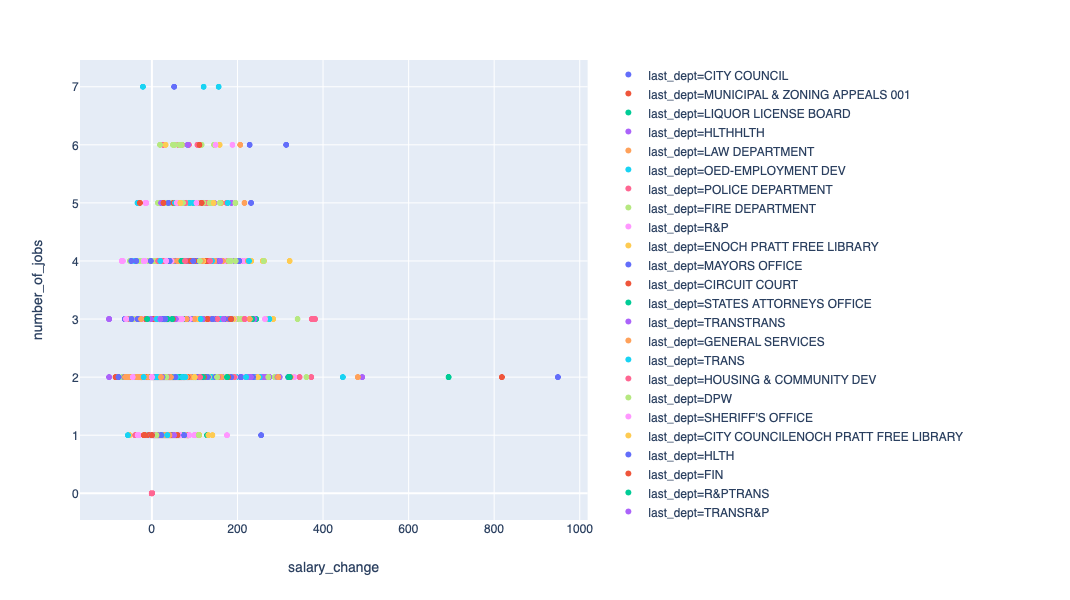

In [111]:
bubble_employees